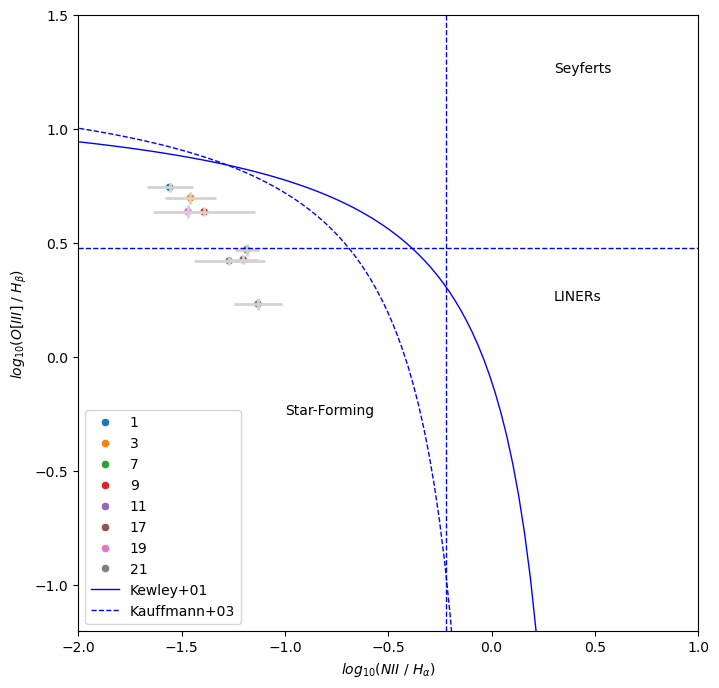

In [11]:
import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes un DataFrame llamado df
# con las siguientes columnas:
# 'NII_6584_FLUX', 'NII_6584_FLUX_ERR', 'H_ALPHA_FLUX', 'H_ALPHA_FLUX_ERR'
# 'OIII_5007_FLUX', 'OIII_5007_FLUX_ERR', 'H_BETA_FLUX', 'H_BETA_FLUX_ERR'

df = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
df = df.drop(index=[8,9,10,11,12])


# Crear columnas de ufloat
df['NII_6584_FLUX_UN'] = df.apply(lambda row: ufloat(row['NII_6584_FLUX'], row['NII_6584_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)

# Calcular las razones con incertidumbres
nii_h_alpha_un = df['NII_6584_FLUX_UN'] / df['H_ALPHA_FLUX_UN']
o3_h_beta_un = df['OIII_5007_FLUX_UN'] / df['H_BETA_FLUX_UN']

# Calcular los logaritmos de las razones usando apply
log_nii_h_alpha_un = nii_h_alpha_un.apply(log10)
log_o3_h_beta_un = o3_h_beta_un.apply(log10)

# Separar los valores nominales y las incertidumbres
log_nii_h_alpha_nom = unumpy.nominal_values(log_nii_h_alpha_un)
log_nii_h_alpha_err = unumpy.std_devs(log_nii_h_alpha_un)
log_o3_h_beta_nom = unumpy.nominal_values(log_o3_h_beta_un)
log_o3_h_beta_err = unumpy.std_devs(log_o3_h_beta_un)



log_NII_Ha = np.linspace(-2.5, 0.3, 100)
log_NII_Ha_Kauffman = np.linspace(-2.5, 0., 100)

log_SII_Ha = np.linspace(-2, 0.3, 100)
log_SII_Ha_kewley = np.linspace(-0.32, 1.2, 100)

log_OI_Ha = np.linspace(-2.5, -0.7, 100)
log_OI_Ha_kewley06 = np.linspace(-1.13, 2.0, 100)

# Ecuaciones para las curvas de Kewley et al. (2001) y las separaciones de Seyfert y LINERs (Kewley 2006) y Kauffmann et al. (2003)
log_OIII_Hb_Kewley = 0.61 / (log_NII_Ha - 0.47) + 1.19 #Kewley+01
log_OIII_Hb_Kauffmann = 0.61 / (log_NII_Ha_Kauffman - 0.05) + 1.30 #Kauffman+03

log_OIII_Hb_SII_Kewley = 0.72 / (log_SII_Ha - 0.32) + 1.30 #Kewley
log_OIII_Hb_SII_Seyfert_LINER = (1.89 * log_SII_Ha_kewley) + 0.76 #Kewley2006

log_OIII_Hb_OI_Kewley = 0.73 / (log_OI_Ha + 0.59) + 1.33 #kewley
log_OIII_Hb_OI_Seyfert_LINER = (1.18 * log_OI_Ha_kewley06) + 1.30 #kewley+06

# Crear el gráfico BPT con barras de error

plt.figure(figsize=(8,8))
plt.errorbar(log_nii_h_alpha_nom, log_o3_h_beta_nom, xerr=log_nii_h_alpha_err, yerr=log_o3_h_beta_err, fmt='none', ecolor='lightgray', elinewidth=2, capsize=0)
sns.scatterplot(x=log_nii_h_alpha_nom, y=log_o3_h_beta_nom,hue=df['ID'])
plt.plot(log_NII_Ha,   log_OIII_Hb_Kewley, '-' , color='blue', lw=1, label='Kewley+01')
plt.plot(log_NII_Ha_Kauffman, log_OIII_Hb_Kauffmann, '--', color='blue', lw=1, label='Kauffmann+03')
plt.ylim(-1.2,1.5)
plt.xlim(-2,1)
plt.axhline(y=np.log10(3), linestyle='--', color='blue', lw=1)
plt.axvline(x=np.log10(0.6), linestyle='--', color='blue', lw=1)
plt.text(s='Star-Forming', x=-1.0, y=-0.25, fontsize=10)
plt.text(s='Seyferts', x=0.3, y=1.25, fontsize=10)
plt.text(s='LINERs', x=0.3, y=0.25, fontsize=10)
#plt.errorbar(x=ratio_NII_Ha,y=ratio_OIII_Hb)
plt.xlabel('$log_{10}$($NII$ / $ H_{\\alpha}$)')
plt.ylabel('$log_{10}$($O[III]$ / $ H_{\\beta}$)')
plt.legend(loc='lower left')

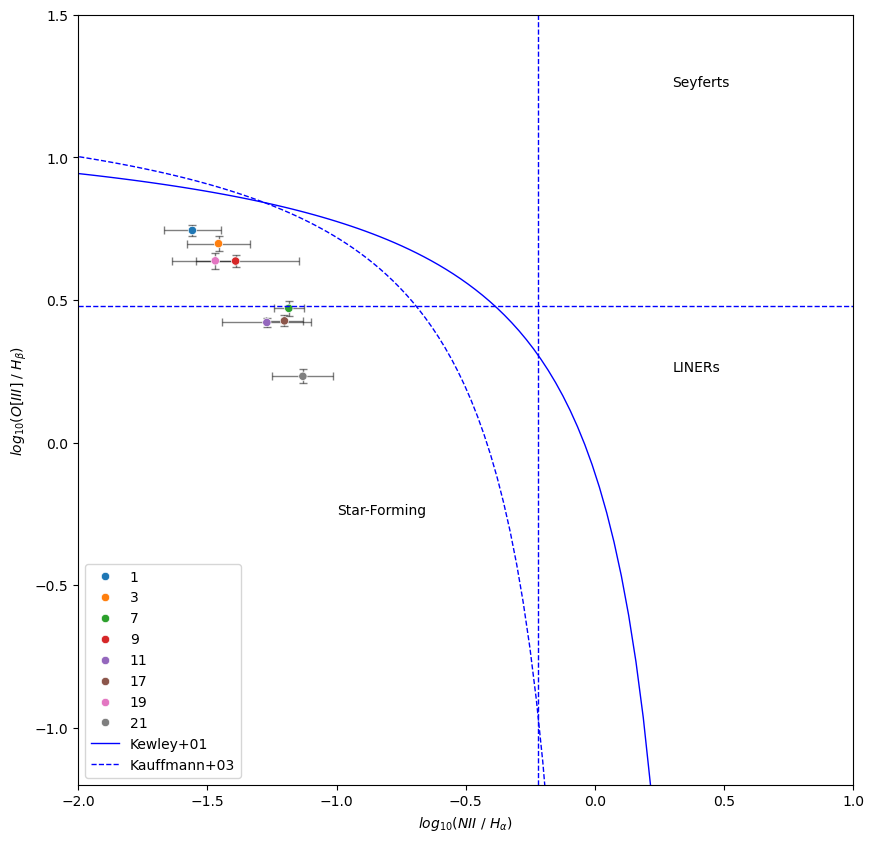

In [14]:
import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes un DataFrame llamado df
# con las siguientes columnas:
# 'NII_6584_FLUX', 'NII_6584_FLUX_ERR', 'H_ALPHA_FLUX', 'H_ALPHA_FLUX_ERR'
# 'OIII_5007_FLUX', 'OIII_5007_FLUX_ERR', 'H_BETA_FLUX', 'H_BETA_FLUX_ERR'

df = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
df = df.drop(index=[8,9,10,11,12])


# Crear columnas de ufloat
df['NII_6584_FLUX_UN'] = df.apply(lambda row: ufloat(row['NII_6584_FLUX'], row['NII_6584_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)

# Calcular las razones con incertidumbres
nii_h_alpha_un = df['NII_6584_FLUX_UN'] / df['H_ALPHA_FLUX_UN']
o3_h_beta_un = df['OIII_5007_FLUX_UN'] / df['H_BETA_FLUX_UN']

# Calcular los logaritmos de las razones usando apply
log_nii_h_alpha_un = nii_h_alpha_un.apply(log10)
log_o3_h_beta_un = o3_h_beta_un.apply(log10)

# Separar los valores nominales y las incertidumbres
log_nii_h_alpha_nom = unumpy.nominal_values(log_nii_h_alpha_un)
log_nii_h_alpha_err = unumpy.std_devs(log_nii_h_alpha_un)
log_o3_h_beta_nom = unumpy.nominal_values(log_o3_h_beta_un)
log_o3_h_beta_err = unumpy.std_devs(log_o3_h_beta_un)



log_NII_Ha = np.linspace(-2.5, 0.3, 100)
log_NII_Ha_Kauffman = np.linspace(-2.5, 0., 100)

log_SII_Ha = np.linspace(-2, 0.3, 100)
log_SII_Ha_kewley = np.linspace(-0.32, 1.2, 100)

log_OI_Ha = np.linspace(-2.5, -0.7, 100)
log_OI_Ha_kewley06 = np.linspace(-1.13, 2.0, 100)

# Ecuaciones para las curvas de Kewley et al. (2001) y las separaciones de Seyfert y LINERs (Kewley 2006) y Kauffmann et al. (2003)
log_OIII_Hb_Kewley = 0.61 / (log_NII_Ha - 0.47) + 1.19 #Kewley+01
log_OIII_Hb_Kauffmann = 0.61 / (log_NII_Ha_Kauffman - 0.05) + 1.30 #Kauffman+03

log_OIII_Hb_SII_Kewley = 0.72 / (log_SII_Ha - 0.32) + 1.30 #Kewley
log_OIII_Hb_SII_Seyfert_LINER = (1.89 * log_SII_Ha_kewley) + 0.76 #Kewley2006

log_OIII_Hb_OI_Kewley = 0.73 / (log_OI_Ha + 0.59) + 1.33 #kewley
log_OIII_Hb_OI_Seyfert_LINER = (1.18 * log_OI_Ha_kewley06) + 1.30 #kewley+06

df_plot = pd.DataFrame({
    'log_NII_H_ALPHA': log_nii_h_alpha_nom,
    'log_OIII_H_BETA': log_o3_h_beta_nom,
    'log_NII_H_ALPHA_err': log_nii_h_alpha_err,
    'log_OIII_H_BETA_err': log_o3_h_beta_err,
    'ID': df['ID']
})

# Crear el gráfico de dispersión con seaborn
plt.figure(figsize=(10, 10))

# Añadir barras de error primero
plt.errorbar(df_plot['log_NII_H_ALPHA'], df_plot['log_OIII_H_BETA'], 
             xerr=df_plot['log_NII_H_ALPHA_err'], yerr=df_plot['log_OIII_H_BETA_err'], 
             fmt='none', ecolor='black', elinewidth=1, capsize=3, alpha=0.5, zorder=1)

# Añadir puntos con seaborn
sns.scatterplot(x='log_NII_H_ALPHA', y='log_OIII_H_BETA', hue='ID', data=df_plot, zorder=2)

# Crear el gráfico BPT con barras de error

#plt.figure(figsize=(8,8))
#plt.errorbar(log_nii_h_alpha_nom, log_o3_h_beta_nom, xerr=log_nii_h_alpha_err, yerr=log_o3_h_beta_err, fmt='none', ecolor='lightgray', elinewidth=2, capsize=0)
#sns.scatterplot(x=log_nii_h_alpha_nom, y=log_o3_h_beta_nom,hue=df['ID'])
plt.plot(log_NII_Ha,   log_OIII_Hb_Kewley, '-' , color='blue', lw=1, label='Kewley+01')
plt.plot(log_NII_Ha_Kauffman, log_OIII_Hb_Kauffmann, '--', color='blue', lw=1, label='Kauffmann+03')
plt.ylim(-1.2,1.5)
plt.xlim(-2,1)
plt.axhline(y=np.log10(3), linestyle='--', color='blue', lw=1)
plt.axvline(x=np.log10(0.6), linestyle='--', color='blue', lw=1)
plt.text(s='Star-Forming', x=-1.0, y=-0.25, fontsize=10)
plt.text(s='Seyferts', x=0.3, y=1.25, fontsize=10)
plt.text(s='LINERs', x=0.3, y=0.25, fontsize=10)
#plt.errorbar(x=ratio_NII_Ha,y=ratio_OIII_Hb)
plt.xlabel('$log_{10}$($NII$ / $ H_{\\alpha}$)')
plt.ylabel('$log_{10}$($O[III]$ / $ H_{\\beta}$)')
plt.legend(loc='lower left')




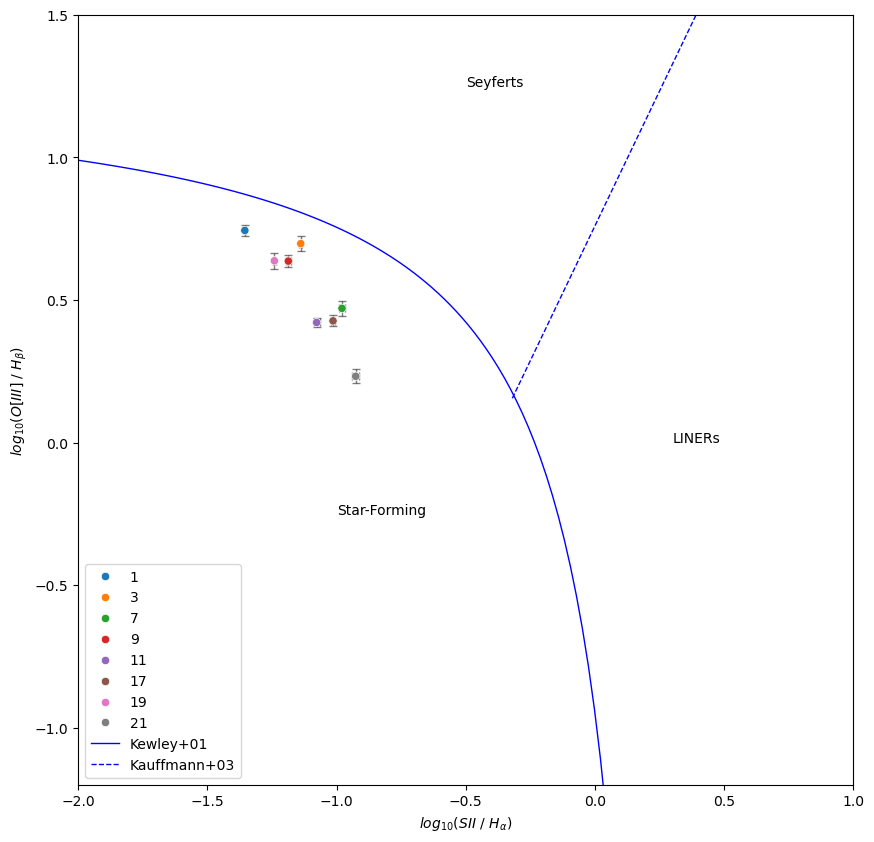

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
from uncertainties.umath import log10

df = pd.read_csv('measurement_emission_lines.tsv', delimiter='\t')
df = df.drop(index=[8,9,10,11,12])

log_NII_Ha = np.linspace(-2.5, 0.3, 100)
log_NII_Ha_Kauffman = np.linspace(-2.5, 0., 100)

log_SII_Ha = np.linspace(-2, 0.3, 100)
log_SII_Ha_kewley = np.linspace(-0.32, 1.2, 100)

log_OI_Ha = np.linspace(-2.5, -0.7, 100)
log_OI_Ha_kewley06 = np.linspace(-1.13, 2.0, 100)

# Ecuaciones para las curvas de Kewley et al. (2001) y las separaciones de Seyfert y LINERs (Kewley 2006) y Kauffmann et al. (2003)
log_OIII_Hb_Kewley = 0.61 / (log_NII_Ha - 0.47) + 1.19 #Kewley+01
log_OIII_Hb_Kauffmann = 0.61 / (log_NII_Ha_Kauffman - 0.05) + 1.30 #Kauffman+03

log_OIII_Hb_SII_Kewley = 0.72 / (log_SII_Ha - 0.32) + 1.30 #Kewley
log_OIII_Hb_SII_Seyfert_LINER = (1.89 * log_SII_Ha_kewley) + 0.76 #Kewley2006

log_OIII_Hb_OI_Kewley = 0.73 / (log_OI_Ha + 0.59) + 1.33 #kewley
log_OIII_Hb_OI_Seyfert_LINER = (1.18 * log_OI_Ha_kewley06) + 1.30 #kewley+06

# Crear columnas de ufloat
df['SII_6716_FLUX_UN'] = df.apply(lambda row: ufloat(row['SII_6716_FLUX'], row['SII_6716_FLUX_ERR']), axis=1)
df['SII_6731_FLUX_UN'] = df.apply(lambda row: ufloat(row['SII_6731_FLUX'], row['SII_6731_FLUX_ERR']), axis=1)
df['H_ALPHA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_ALPHA_FLUX'], row['H_ALPHA_FLUX_ERR']), axis=1)
df['OIII_5007_FLUX_UN'] = df.apply(lambda row: ufloat(row['OIII_5007_FLUX'], row['OIII_5007_FLUX_ERR']), axis=1)
df['H_BETA_FLUX_UN'] = df.apply(lambda row: ufloat(row['H_BETA_FLUX'], row['H_BETA_FLUX_ERR']), axis=1)

# Sumar las dos líneas de azufre
sii_sum_flux_un = df['SII_6716_FLUX_UN'] + df['SII_6731_FLUX_UN']

# Calcular las razones con incertidumbres
sii_ha_un = sii_sum_flux_un / df['H_ALPHA_FLUX_UN']
o3_hb_un = df['OIII_5007_FLUX_UN'] / df['H_BETA_FLUX_UN']

# Calcular los logaritmos de las razones usando apply
log_sii_ha_un = sii_ha_un.apply(log10)
log_o3_hb_un = o3_hb_un.apply(log10)

# Separar los valores nominales y las incertidumbres
log_sii_ha_nom = unumpy.nominal_values(log_sii_ha_un)
log_sii_ha_err = unumpy.std_devs(log_sii_ha_un)
log_o3_hb_nom = unumpy.nominal_values(log_o3_hb_un)
log_o3_hb_err = unumpy.std_devs(log_o3_hb_un)

# Crear DataFrame para seaborn
df_plot2 = pd.DataFrame({
    'log_SII_H_ALPHA': log_sii_ha_nom,
    'log_OIII_H_BETA': log_o3_hb_nom,
    'log_SII_H_ALPHA_err': log_sii_ha_err,
    'log_OIII_H_BETA_err': log_o3_hb_err,
    'ID': df['ID']
})

# Crear el gráfico de dispersión con seaborn
plt.figure(figsize=(10, 10))

# Añadir barras de error primero
plt.errorbar(df_plot2['log_SII_H_ALPHA'], df_plot2['log_OIII_H_BETA'], 
             xerr=df_plot2['log_SII_H_ALPHA_err'], yerr=df_plot2['log_OIII_H_BETA_err'], 
             fmt='none', ecolor='black', elinewidth=1, capsize=3, alpha=0.5, zorder=1)

# Añadir puntos con seaborn
sns.scatterplot(x='log_SII_H_ALPHA', y='log_OIII_H_BETA', hue='ID', data=df_plot2, zorder=2)
plt.plot(log_SII_Ha,   log_OIII_Hb_SII_Kewley, '-' , color='blue', lw=1, label='Kewley+01')
plt.plot(log_SII_Ha_kewley, log_OIII_Hb_SII_Seyfert_LINER, '--', color='blue', lw=1, label='Kauffmann+03')
plt.ylim(-1.2,1.5)
plt.xlim(-2,1)
plt.text(s='Star-Forming', x=-1.0, y=-0.25, fontsize=10)
plt.text(s='Seyferts', x=-0.5, y=1.25, fontsize=10)
plt.text(s='LINERs', x=0.3, y=0, fontsize=10)
#plt.errorbar(x=ratio_NII_Ha,y=ratio_OIII_Hb)
plt.xlabel('$log_{10}$($SII$ / $ H_{\\alpha}$)')
plt.ylabel('$log_{10}$($O[III]$ / $ H_{\\beta}$)')
plt.legend()

In [22]:
df_plot2['log_SII_H_ALPHA']

0   -1.355445
1   -1.138981
2   -0.979379
3   -1.187219
4   -1.077705
5   -1.014115
6   -1.241072
7   -0.926326
Name: log_SII_H_ALPHA, dtype: float64

In [18]:
df_plot2['log_SII_H_ALPHA_err']

0    0.005874
1    0.006140
2    0.013444
3    0.009807
4    0.011639
5    0.008211
6    0.005544
7    0.013797
Name: log_SII_H_ALPHA_err, dtype: float64

In [19]:
df['H_ALPHA_FLUX'], df['H_ALPHA_FLUX_ERR']

(0    280.129860
 1     49.981168
 2     41.935169
 3     90.248278
 4    154.922381
 5     32.582814
 6     23.027740
 7     33.871394
 Name: H_ALPHA_FLUX, dtype: float64,
 0    2.023057
 1    0.499074
 2    0.387233
 3    1.855688
 4    3.912832
 5    0.354138
 6    0.139001
 7    0.833682
 Name: H_ALPHA_FLUX_ERR, dtype: float64)

In [20]:
df['SII_6716_FLUX'], df['SII_6716_FLUX_ERR']

(0    6.986487
 1    2.082050
 2    2.686583
 3    3.322156
 4    7.358254
 5    1.848934
 6    0.775210
 7    2.251778
 Name: SII_6716_FLUX, dtype: float64,
 0    0.106601
 1    0.027748
 2    0.100433
 3    0.041067
 4    0.088396
 5    0.037257
 6    0.011277
 7    0.060710
 Name: SII_6716_FLUX_ERR, dtype: float64)

In [21]:
df['SII_6731_FLUX'], df['SII_6731_FLUX_ERR']

(0    5.370542
 1    1.547268
 2    1.710856
 3    2.542199
 4    5.595892
 5    1.305155
 6    0.546632
 7    1.761569
 Name: SII_6731_FLUX, dtype: float64,
 0    0.092780
 1    0.023448
 2    0.082432
 3    0.036207
 4    0.075263
 5    0.031506
 6    0.009688
 7    0.053027
 Name: SII_6731_FLUX_ERR, dtype: float64)